In [1]:
import pandas as pd
file_path = r'/kaggle/input/wallets_features_classes_combined.csv'
df_wallets_features_classes_combined = pd.read_csv(file_path)

In [2]:
import optuna

In [3]:
# 2. Preprocess data
df_wallets_classification = df_wallets_features_classes_combined.drop(columns=['Time step']).drop_duplicates()
data = df_wallets_classification.loc[(df_wallets_classification['class'] != 3), 'address']
df_wallets_feature_selected = df_wallets_classification.loc[df_wallets_classification['address'].isin(data)]

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.base import clone 
import xgboost as xgb

In [5]:
# Define X and y
y = df_wallets_feature_selected[['class']]
y = y['class'].apply(lambda x: 0 if x == 2 else 1 )
X = df_wallets_feature_selected.drop(columns=['address', 'class'])

# Train/Test Split (use a smaller test_size for faster experimentation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

In [6]:
# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [7]:
X_test_scaled

,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,first_received_block,num_timesteps_appeared_in,btc_transacted_total,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median
0,0.000688,0.001862,0.729176,0.729186,0.00001,0.00068,0.946292,0.946290,0.0,1.432165e-06,...,0.0,0.0,0.0,0.0,0.0,0.000159,0.0,0.0,0.0,0.0
1,0.000688,0.001862,0.479246,0.479256,0.00001,0.00068,0.896726,0.896724,0.0,4.938098e-07,...,0.0,0.0,0.0,0.0,0.0,0.000026,0.0,0.0,0.0,0.0
2,0.000688,0.000000,0.083338,0.083338,0.00000,0.00000,0.818208,0.000000,0.0,8.248422e-07,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000688,0.001862,0.000114,0.000124,0.00001,0.00068,0.801705,0.801703,0.0,7.642479e-07,...,0.0,0.0,0.0,0.0,0.0,0.000106,0.0,0.0,0.0,0.0
4,0.000688,0.000000,0.645828,0.645828,0.00000,0.00000,0.929761,0.000000,0.0,1.658151e-07,...,0.0,0.0,0.0,0.0,0.0,0.000026,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79602,0.000000,0.001862,0.208360,0.208360,0.00000,0.00000,0.000000,0.843002,0.0,4.866461e-09,...,0.0,0.0,0.0,0.0,0.0,0.000079,0.0,0.0,0.0,0.0
79603,0.000000,0.001862,0.458331,0.458331,0.00000,0.00000,0.000000,0.892576,0.0,1.061239e-08,...,0.0,0.0,0.0,0.0,0.0,0.000106,0.0,0.0,0.0,0.0
79604,0.000000,0.001862,0.312508,0.312508,0.00000,0.00000,0.000000,0.863657,0.0,1.599666e-07,...,0.0,0.0,0.0,0.0,0.0,0.000211,0.0,0.0,0.0,0.0
79605,0.000000,0.001862,0.479173,0.479173,0.00000,0.00000,0.000000,0.896710,0.0,1.108779e-06,...,0.0,0.0,0.0,0.0,0.0,0.000264,0.0,0.0,0.0,0.0


## Train model again

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support, f1_score
from lightgbm import LGBMClassifier

In [9]:
def evaluate_model(model_name, y_true, y_pred):
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred)
    micro_f1 = f1_score(y_true, y_pred, average='micro')
    print(f"\n 📌 {model_name}")
    print("Precision: %.3f" % prec[1])
    print("Recall: %.3f" % rec[1])
    print("F1 Score: %.3f" % f1[1])
    print("Micro-Average F1: %.3f" % micro_f1)

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
evaluate_model("Random Forest", y_test, y_pred_rf)


 📌 Random Forest
Precision: 0.921
Recall: 0.790
F1 Score: 0.850
Micro-Average F1: 0.990


In [11]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
evaluate_model("XGBoost", y_test, y_pred_xgb)


 📌 XGBoost
Precision: 0.888
Recall: 0.809
F1 Score: 0.846
Micro-Average F1: 0.989


# Use best model for feature selection

## Feature importance

In [12]:
#  Calculate Feature Importance
rf_importances = rf.feature_importances_
xgb_importances = xgb.feature_importances_

imp_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'RF_Imp': rf_importances,
    'XGB_Imp': xgb_importances
})

imp_df['Imp'] = (imp_df['RF_Imp'] + imp_df['XGB_Imp']) / 2
imp_df['Imp_max'] = imp_df[['RF_Imp', 'XGB_Imp']].max(axis=1)
imp_df_sorted = imp_df.sort_values(by="Imp", ascending=False)
imp_df_max_sorted = imp_df.sort_values(by="Imp_max", ascending=False)

## PFI (Permutation feature importance)

In [13]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.base import clone
# PFI Calculations
perm_rf = PermutationImportance(rf, random_state=42).fit(X_test_scaled, y_test)
pfi_rf = eli5.explain_weights_df(perm_rf, feature_names=X_test_scaled.columns.tolist())
pfi_rf = pfi_rf[['feature', 'weight']].rename(columns={'weight': 'weight_rf'})

perm_xgb = PermutationImportance(xgb, random_state=42).fit(X_test_scaled, y_test)
pfi_xgb = eli5.explain_weights_df(perm_xgb, feature_names=X_test_scaled.columns.tolist())
pfi_xgb = pfi_xgb[['feature', 'weight']].rename(columns={'weight': 'weight_xgb'})

pfi_merged = pd.merge(pfi_rf, pfi_xgb, on='feature', how='outer') #outer merge here as it can be empty for at least 1 model
pfi_merged['weight_mean'] = pfi_merged[['weight_rf', 'weight_xgb']].mean(axis=1) #Create weight mean, but there could be NA's
pfi_merged['weight_max'] = pfi_merged[['weight_rf', 'weight_xgb']].max(axis=1)

2025-06-01 14:50:07.384409: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748789407.607963      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748789407.677958      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## DCFI (Drop Column Feature Importance)

In [14]:
import numpy as np
# DCFI Calculation
def compute_dcfi(model, X_train, y_train, random_state=42):
    """
    Computes Drop Column Feature Importance (DCFI) for a given model.
    """
    model_clone = clone(model)
    if hasattr(model_clone, 'random_state'):
        model_clone.random_state = random_state

    X_train_array = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
    y_train_array = y_train.values if isinstance(y_train, pd.Series) else y_train

    model_clone.fit(X_train_array, y_train_array)
    benchmark_score = model_clone.score(X_train_array, y_train_array)

    importances = []
    features = X_train.columns.tolist() if isinstance(X_train, pd.DataFrame) else [f'Feature_{i}' for i in range(X_train_array.shape[1])]

    for i, col in enumerate(features):
        model_clone = clone(model)
        if hasattr(model_clone, 'random_state'):
            model_clone.random_state = random_state

        X_subset_array = np.delete(X_train_array, i, axis=1)

        model_clone.fit(X_subset_array, y_train_array)
        drop_col_score = model_clone.score(X_subset_array, y_train_array)
        importances.append(benchmark_score - drop_col_score)

    dcfi_df = pd.DataFrame({
        'Feature': features,
        'Imp': importances
    }).sort_values('Imp', ascending=False).reset_index(drop=True)

    return dcfi_df

dcfi_rf = compute_dcfi(rf, X_train_scaled, y_train)
dcfi_xgb = compute_dcfi(xgb, X_train_scaled, y_train)

dcfi_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'RF_Imp': dcfi_rf['Imp'].values,
    'XGB_Imp': dcfi_xgb['Imp'].values,
})

dcfi_df['Imp_mean'] = dcfi_df[['RF_Imp', 'XGB_Imp']].mean(axis=1)
dcfi_df['Imp_max'] = dcfi_df[['RF_Imp', 'XGB_Imp']].max(axis=1)

dcfi_df_sorted_mean = dcfi_df.sort_values('Imp_mean', ascending=False).reset_index(drop=True)
dcfi_df_sorted_max = dcfi_df.sort_values('Imp_max', ascending=False).reset_index(drop=True)

In [15]:
#  Combine Results and Select Features

# 1. FI
fi_mean_df = imp_df_sorted[['Feature', 'Imp']].rename(columns={'Imp': 'FI_Mean'})
fi_max_df = imp_df_max_sorted[['Feature', 'Imp_max']].rename(columns={'Imp_max': 'FI_Max'})

# 2. PFI
pfi_mean_df = pfi_merged[['feature', 'weight_mean']].rename(columns={'feature': 'Feature', 'weight_mean': 'PFI_Mean'})
pfi_max_df = pfi_merged[['feature', 'weight_max']].rename(columns={'feature': 'Feature', 'weight_max': 'PFI_Max'})

# 3. DCFI
dcfi_mean_df = dcfi_df[['Feature', 'Imp_mean']].rename(columns={'Feature': 'Feature', 'Imp_mean': 'DCFI_Mean'})
dcfi_max_df = dcfi_df[['Feature', 'Imp_max']].rename(columns={'Feature': 'Feature', 'Imp_max': 'DCFI_Max'})

In [16]:
# Merge toàn bộ
merged = fi_mean_df.merge(pfi_mean_df, on='Feature',how='inner').merge(dcfi_mean_df, on='Feature',how='inner')
merged_max = fi_max_df.merge(pfi_max_df, on='Feature',how='inner').merge(dcfi_max_df, on='Feature',how='inner')

#Display Merged DataFrames
print("\\nMerged Mean DataFrame:")
print(merged.head())

print("\\nMerged Max DataFrame:")
print(merged_max.head())

# Chuẩn hóa
scaler = MinMaxScaler()
merged[['FI_Mean', 'PFI_Mean', 'DCFI_Mean']] = scaler.fit_transform(merged[['FI_Mean', 'PFI_Mean', 'DCFI_Mean']])
merged_max[['FI_Max', 'PFI_Max', 'DCFI_Max']] = scaler.fit_transform(merged_max[['FI_Max', 'PFI_Max', 'DCFI_Max']])

# 10 Output top 20 selected features 
# Mean-based tổng hợp
merged['Mean_Score'] = merged[['FI_Mean', 'PFI_Mean', 'DCFI_Mean']].mean(axis=1)
merged_max['Max_Score'] = merged_max[['FI_Max', 'PFI_Max', 'DCFI_Max']].max(axis=1)
# Top and bottom 20 theo trung bình
top20_mean = merged.sort_values('Mean_Score', ascending=False).head(20)['Feature'].tolist()
bottom20_mean = merged.sort_values('Mean_Score', ascending=True).head(20)['Feature'].tolist()

# Top and bottom 20 theo max
top20_max = merged_max.sort_values('Max_Score', ascending=False).head(20)['Feature'].tolist()
bottom20_max = merged_max.sort_values('Max_Score', ascending=True).head(20)['Feature'].tolist()

print(f"top20_mean: {top20_mean}")
print(f"top20_max: {top20_max}")

\nMerged Mean DataFrame:
                      Feature   FI_Mean  PFI_Mean  DCFI_Mean
0          lifetime_in_blocks  0.150680  0.002339   0.000275
1  transacted_w_address_total  0.071813  0.008282  -0.000070
2            first_sent_block  0.057071  0.004782   0.000256
3   num_timesteps_appeared_in  0.047976  0.000038   0.000218
4                    fees_min  0.038015  0.005545   0.000067
\nMerged Max DataFrame:
                      Feature    FI_Max   PFI_Max  DCFI_Max
0          lifetime_in_blocks  0.275653  0.004414  0.000549
1   num_timesteps_appeared_in  0.089482  0.000063  0.000436
2  transacted_w_address_total  0.088648  0.010999 -0.000011
3            first_sent_block  0.061044  0.007806  0.000511
4                    fees_max  0.054713  0.006876  0.000135
top20_mean: ['lifetime_in_blocks', 'transacted_w_address_total', 'first_sent_block', 'fees_min', 'num_txs_as receiver', 'last_block_appeared_in', 'num_txs_as_sender', 'fees_max', 'first_block_appeared_in', 'fees_as_share_max'

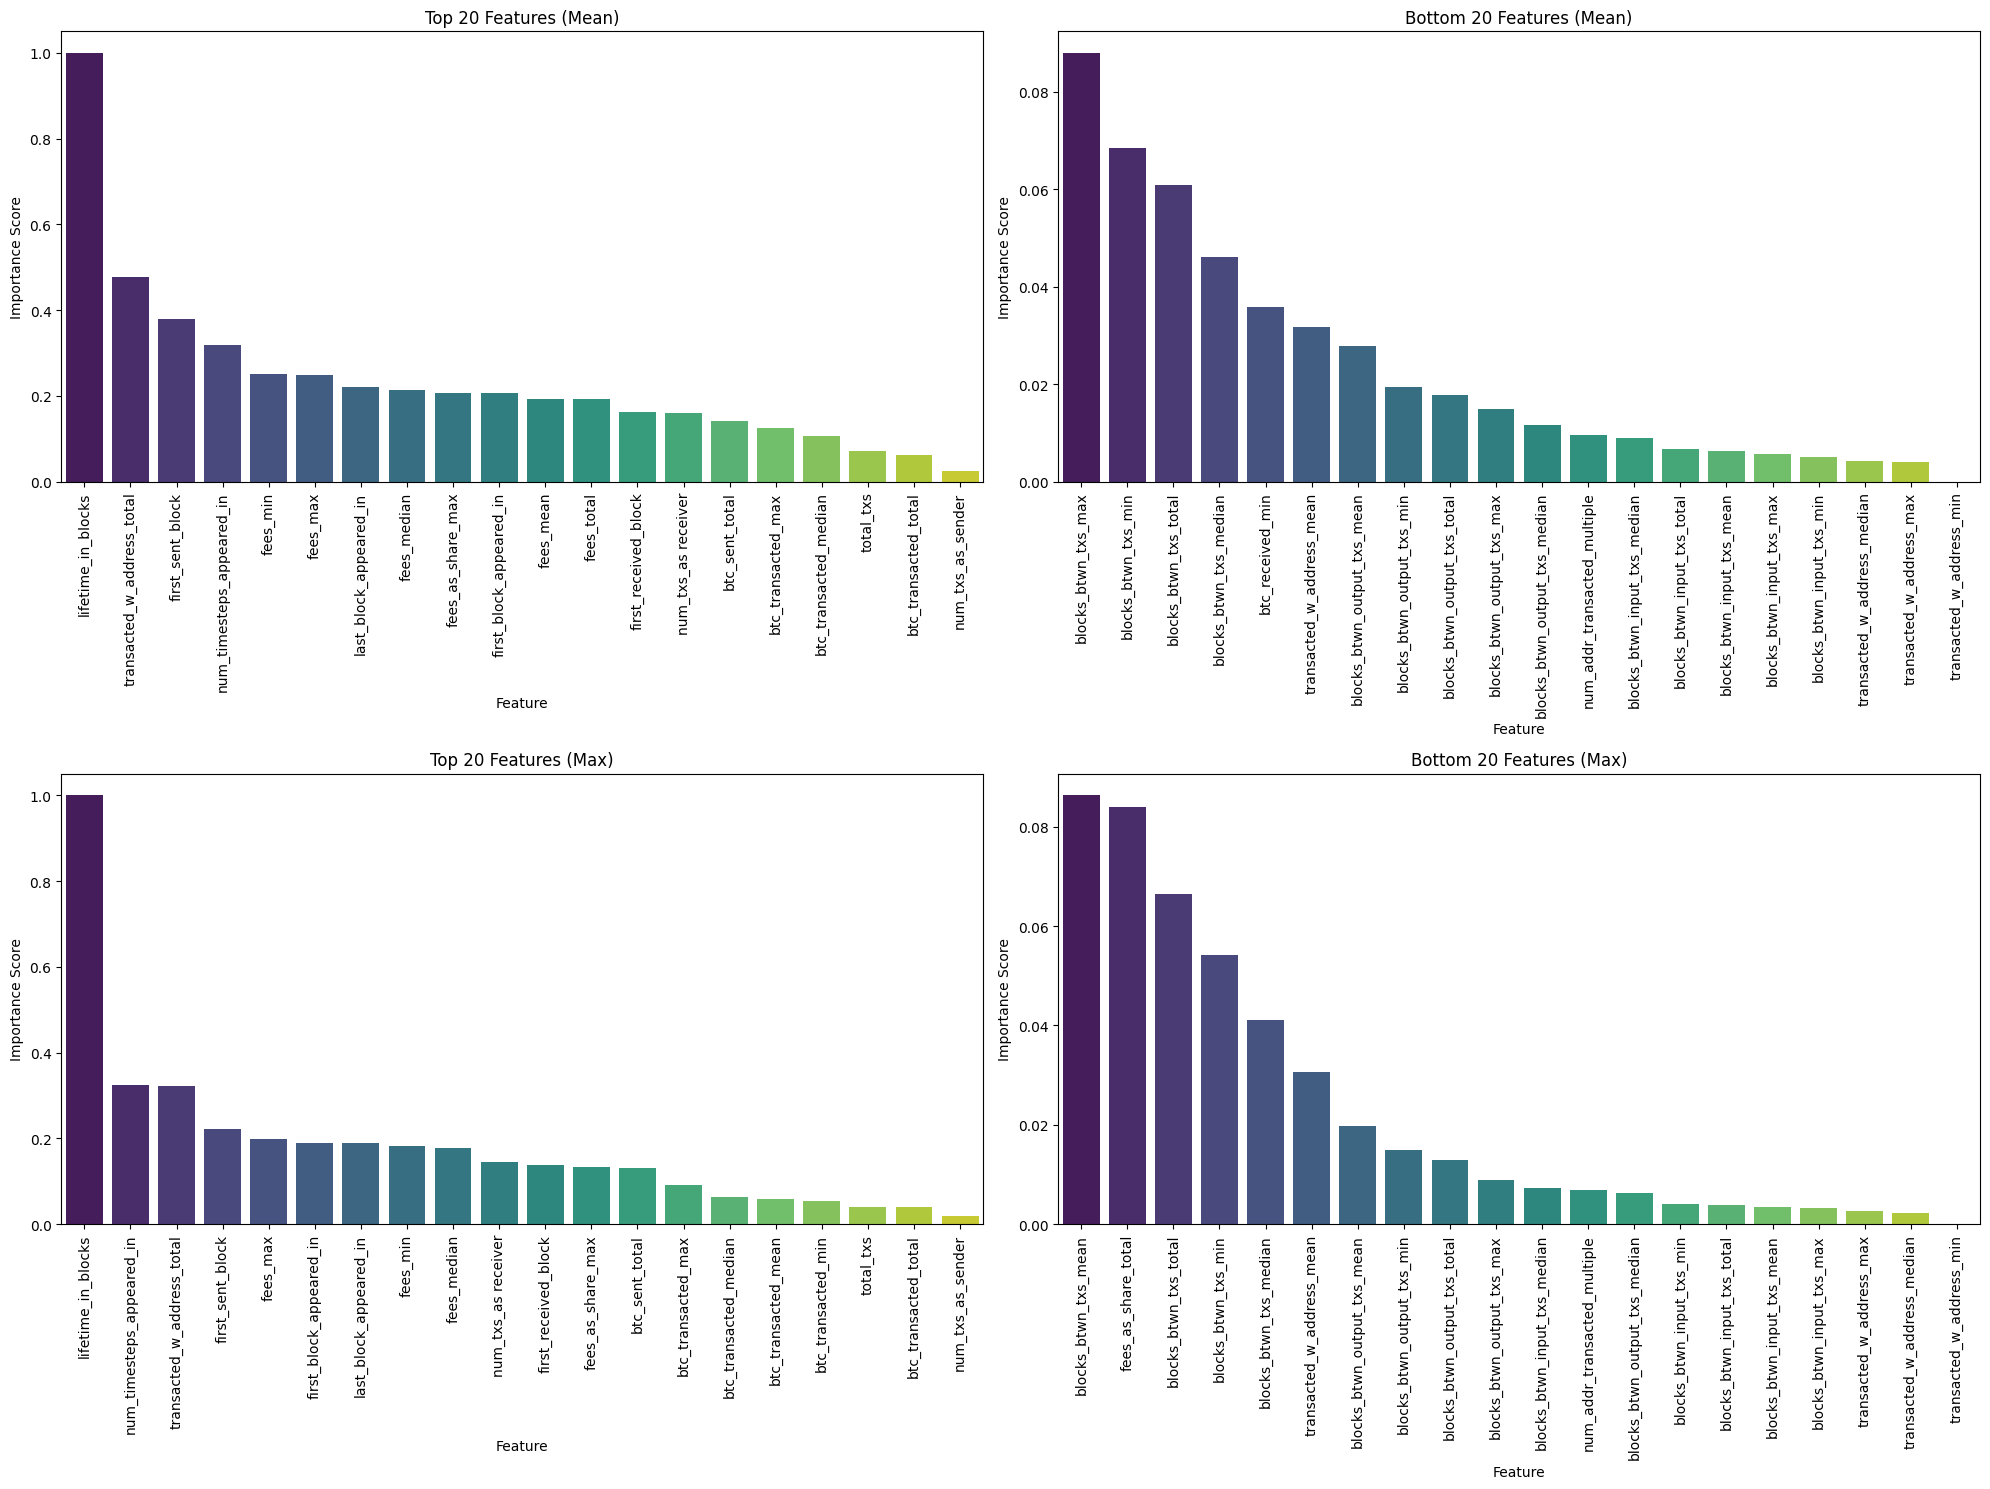

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create a bar plot
def plot_feature_importances(df, features, title, ax):
    df_subset = df[df['Feature'].isin(features)].set_index('Feature')
    sns.barplot(x=df_subset.index, y=df_subset[df_subset.columns[0]], ax=ax, palette="viridis")
    ax.set_title(title)
    ax.set_ylabel("Importance Score")
    ax.tick_params(axis='x', rotation=90)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Plotting
plot_feature_importances(merged, top20_mean, "Top 20 Features (Mean)", axes[0, 0])
plot_feature_importances(merged, bottom20_mean, "Bottom 20 Features (Mean)", axes[0, 1])
plot_feature_importances(merged_max, top20_max, "Top 20 Features (Max)", axes[1, 0])
plot_feature_importances(merged_max, bottom20_max, "Bottom 20 Features (Max)", axes[1, 1])

plt.tight_layout()
plt.show()

In [18]:
num_features = 49
# 1. Calculate the top n, based on the original values and feature selection
top29_mean = merged.sort_values('Mean_Score', ascending=False)['Feature'].head(num_features).tolist()
top29_max = merged_max.sort_values('Max_Score', ascending=False)['Feature'].tolist()

# 2. Select features using .copy()
X_train_selected_mean = X_train_scaled[top29_mean].copy()
X_test_selected_mean = X_test_scaled[top29_mean].copy()

X_train_selected_max = X_train_scaled[top29_max].copy()
X_test_selected_max = X_test_scaled[top29_max].copy()

In [19]:
X_train_selected_mean.columns

Index(['lifetime_in_blocks', 'transacted_w_address_total', 'first_sent_block',
       'fees_min', 'num_txs_as receiver', 'last_block_appeared_in',
       'num_txs_as_sender', 'fees_max', 'first_block_appeared_in',
       'fees_as_share_max', 'first_received_block',
       'num_timesteps_appeared_in', 'fees_median', 'total_txs',
       'btc_transacted_total', 'btc_sent_total', 'fees_total', 'fees_mean',
       'btc_transacted_max', 'btc_transacted_median', 'btc_transacted_mean',
       'btc_transacted_min', 'btc_sent_min', 'blocks_btwn_txs_mean',
       'fees_as_share_median', 'btc_sent_median', 'fees_as_share_min',
       'btc_sent_mean', 'btc_received_median', 'fees_as_share_total',
       'fees_as_share_mean', 'btc_sent_max', 'btc_received_mean',
       'btc_received_total', 'btc_received_max', 'btc_received_min',
       'blocks_btwn_txs_max', 'blocks_btwn_txs_min', 'blocks_btwn_txs_total',
       'blocks_btwn_txs_median', 'blocks_btwn_output_txs_mean',
       'blocks_btwn_input_txs_

# Retrain model

## Random forest

In [20]:
def tune_and_train(X_train, y_train, X_test, y_test, model_type='rf', n_trials=10):
    def objective(trial):
        if model_type == 'rf':
            rf_params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 300), # Có thể tăng giới hạn trên
                'max_depth': trial.suggest_int('max_depth', 5, 20),     # Có thể tăng giới hạn trên
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'class_weight': trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample', None]), # Thêm class_weight
                'random_state': 42,
                'n_jobs': -1
            }
            model = RandomForestClassifier(**rf_params)
        elif model_type == 'xgb':
            xgb_params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 300),
                'max_depth': trial.suggest_int('max_depth', 3, 10), # XGB thường dùng max_depth nhỏ hơn RF
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
                'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                'gamma': trial.suggest_float('gamma', 0, 0.5),
                'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10), # Cho dữ liệu mất cân bằng
                'random_state': 42,
                'use_label_encoder': False,
                'eval_metric': 'logloss' # hoặc 'aucpr' nếu muốn tối ưu AUC của Precision-Recall curve
            }
            model = XGBClassifier(**xgb_params)
        else:
            raise ValueError("Invalid model_type. Choose 'rf' or 'xgb'.")

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # TỐI ƯU F1-SCORE CHO LỚP 1 (ILLICIT)
        # pos_label=1 chỉ định rằng chúng ta quan tâm đến F1 của lớp dương (lớp 1)
        # average='binary' là mặc định cho phân loại nhị phân và tính cho pos_label
        f1 = f1_score(y_test, y_pred, pos_label=1, average='binary')
        return f1 # Optuna sẽ cố gắng maximize giá trị này

    study = optuna.create_study(direction='maximize') # Đảm bảo direction là 'maximize'
    study.optimize(objective, n_trials=n_trials)

    best_params = study.best_params
    print(f"Best parameters found for F1-score (pos_label=1): {best_params}")

    if model_type == 'rf':
        best_model = RandomForestClassifier(**best_params, random_state=42, n_jobs = -1)
    elif model_type == 'xgb':
        # Chắc chắn thêm tree_method='gpu_hist' nếu bạn muốn dùng GPU khi huấn luyện lại
        best_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')

    best_model.fit(X_train, y_train)
    return best_model


In [21]:
def evaluate_model(model_name, y_true, y_pred):
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, zero_division=0)
    micro_f1 = f1_score(y_true, y_pred, average='micro')
    print(f"\n 📌 {model_name}")
    if len(prec) > 1 :
        print("Precision (class 1): %.3f" % prec[1])
        print("Recall (class 1): %.3f" % rec[1])
        print("F1 Score (class 1): %.3f" % f1[1])
    else:
        print("Precision (class 1): N/A (no predictions for class 1)")
        print("Recall (class 1): N/A (no predictions for class 1)")
        print("F1 Score (class 1): N/A (no predictions for class 1)")
    print("Micro-Average F1: %.3f" % micro_f1)

In [22]:
print("Tuning RF (Mean Features)")
best_rf_mean = tune_and_train(X_train_selected_mean, y_train, X_test_selected_mean, y_test, model_type='rf', n_trials=50)

[I 2025-06-01 15:57:33,795] A new study created in memory with name: no-name-6df74a70-8975-4ef6-8c99-7dcfbdfe400f


Tuning RF (Mean Features)


[I 2025-06-01 15:57:59,178] Trial 0 finished with value: 0.6657908565423016 and parameters: {'n_estimators': 121, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6657908565423016.
[I 2025-06-01 15:58:33,980] Trial 1 finished with value: 0.7405452946350045 and parameters: {'n_estimators': 145, 'max_depth': 19, 'min_samples_split': 11, 'min_samples_leaf': 10, 'class_weight': 'balanced_subsample'}. Best is trial 1 with value: 0.7405452946350045.
[I 2025-06-01 15:59:11,858] Trial 2 finished with value: 0.781881313131313 and parameters: {'n_estimators': 157, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 3, 'class_weight': 'balanced_subsample'}. Best is trial 2 with value: 0.781881313131313.
[I 2025-06-01 15:59:56,314] Trial 3 finished with value: 0.6982522636344493 and parameters: {'n_estimators': 244, 'max_depth': 9, 'min_samples_split': 13, 'min_samples_leaf': 6, 'class_weight': None}. Best is trial 

Best parameters found for F1-score (pos_label=1): {'n_estimators': 201, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'class_weight': None}


In [23]:
fit_features = X_train_selected_mean.columns.tolist()
X_test_for_predict = X_test_selected_mean[fit_features]

# Bây giờ thực hiện predict
y_pred_best_rf = best_rf_mean.predict(X_test_for_predict)
evaluate_model("Best Random Forest (Mean)", y_test, y_pred_best_rf)


 📌 Best Random Forest (Mean)
Precision (class 1): 0.920
Recall (class 1): 0.769
F1 Score (class 1): 0.838
Micro-Average F1: 0.989


In [24]:
best_params_from_49_features = {
    'n_estimators': 132,
    'max_depth': 19,
    'min_samples_split': 7,
    'min_samples_leaf': 2,
    'class_weight': None  
}

In [25]:
print("\n--- Training RF on ALL Features (55) using Previously Found Best Params ---")

# Tạo một mô hình Random Forest mới với các tham số đã lấy được
rf_on_all_features_with_tuned_params = RandomForestClassifier(
    **best_params_from_49_features, # Sử dụng bộ tham số đã tune
    random_state=42,  # Giữ random_state để có thể so sánh
    n_jobs=-1         # Sử dụng đa luồng
)


--- Training RF on ALL Features (55) using Previously Found Best Params ---


In [26]:
rf_on_all_features_with_tuned_params.fit(X_train_scaled, y_train)
print("\n--- Evaluating RF on ALL Test Features (using Previously Found Best Params) ---")

y_pred_rf_all_features = rf_on_all_features_with_tuned_params.predict(X_test_scaled)
evaluate_model("RF on ALL Features (Params from 49-feature tuning)", y_test, y_pred_rf_all_features)


print("\n--- For Reference: Original Untuned RF on ALL Features ---")
rf_original = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_original.fit(X_train_scaled, y_train)
y_pred_rf_original = rf_original.predict(X_test_scaled)
evaluate_model("Original Untuned RF on ALL Features", y_test, y_pred_rf_original)


--- Evaluating RF on ALL Test Features (using Previously Found Best Params) ---

 📌 RF on ALL Features (Params from 49-feature tuning)
Precision (class 1): 0.918
Recall (class 1): 0.764
F1 Score (class 1): 0.834
Micro-Average F1: 0.989

--- For Reference: Original Untuned RF on ALL Features ---

 📌 Original Untuned RF on ALL Features
Precision (class 1): 0.921
Recall (class 1): 0.790
F1 Score (class 1): 0.850
Micro-Average F1: 0.990


## Tuning RF on max features

In [27]:
print("Tuning RF (Max Features)")
best_rf_mean = tune_and_train(X_train_selected_max, y_train, X_test_selected_max, y_test, model_type='rf', n_trials=10)


[I 2025-06-01 16:39:11,834] A new study created in memory with name: no-name-b89055d8-14ce-43b7-ba51-747d060ee907


Tuning RF (Max Features)


[I 2025-06-01 16:39:45,377] Trial 0 finished with value: 0.6915579958819492 and parameters: {'n_estimators': 166, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 1, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6915579958819492.
[I 2025-06-01 16:40:29,022] Trial 1 finished with value: 0.8175154320987654 and parameters: {'n_estimators': 196, 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 3, 'class_weight': None}. Best is trial 1 with value: 0.8175154320987654.
[I 2025-06-01 16:41:15,351] Trial 2 finished with value: 0.6413957574996861 and parameters: {'n_estimators': 233, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 6, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.8175154320987654.
[I 2025-06-01 16:41:52,959] Trial 3 finished with value: 0.7676425269645609 and parameters: {'n_estimators': 183, 'max_depth': 19, 'min_samples_split': 13, 'min_samples_leaf': 2, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.81

Best parameters found for F1-score (pos_label=1): {'n_estimators': 284, 'max_depth': 19, 'min_samples_split': 10, 'min_samples_leaf': 3, 'class_weight': None}


In [28]:
fit_features = X_train_selected_max.columns.tolist()
X_test_for_predict = X_test_selected_max[fit_features]

# Bây giờ thực hiện predict
y_pred_best_rf = best_rf_mean.predict(X_test_for_predict)
evaluate_model("Best Random Forest (Mean)", y_test, y_pred_best_rf)


 📌 Best Random Forest (Mean)
Precision (class 1): 0.919
Recall (class 1): 0.756
F1 Score (class 1): 0.829
Micro-Average F1: 0.989


In [29]:
best_params_from_49_features = { # not tune for max
    'n_estimators': 132,
    'max_depth': 19,
    'min_samples_split': 7,
    'min_samples_leaf': 2,
    'class_weight': None  
}

In [30]:
print("\n--- Training RF on ALL Features (55) using Previously Found Best Params ---")

# Tạo một mô hình Random Forest mới với các tham số đã lấy được
rf_on_all_features_with_tuned_params = RandomForestClassifier(
    **best_params_from_49_features, # Sử dụng bộ tham số đã tune
    random_state=42,  # Giữ random_state để có thể so sánh
    n_jobs=-1         # Sử dụng đa luồng
)


--- Training RF on ALL Features (55) using Previously Found Best Params ---


In [31]:
rf_on_all_features_with_tuned_params.fit(X_train_scaled, y_train)
print("\n--- Evaluating RF on ALL Test Features (using Previously Found Best Params) ---")

y_pred_rf_all_features = rf_on_all_features_with_tuned_params.predict(X_test_scaled)
evaluate_model("RF on ALL Features (Params from 49-feature tuning)", y_test, y_pred_rf_all_features)


print("\n--- For Reference: Original Untuned RF on ALL Features ---")
rf_original = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_original.fit(X_train_scaled, y_train)
y_pred_rf_original = rf_original.predict(X_test_scaled)
evaluate_model("Original Untuned RF on ALL Features", y_test, y_pred_rf_original)


--- Evaluating RF on ALL Test Features (using Previously Found Best Params) ---

 📌 RF on ALL Features (Params from 49-feature tuning)
Precision (class 1): 0.918
Recall (class 1): 0.764
F1 Score (class 1): 0.834
Micro-Average F1: 0.989

--- For Reference: Original Untuned RF on ALL Features ---

 📌 Original Untuned RF on ALL Features
Precision (class 1): 0.921
Recall (class 1): 0.790
F1 Score (class 1): 0.850
Micro-Average F1: 0.990


## Tuning XGB Max features

In [32]:
print("Tuning XGB (Max Features)")
best_xgb = tune_and_train(X_train_selected_max, y_train, X_test_selected_max, y_test, model_type='xgb', n_trials=20)  # Adjust n_trials

[I 2025-06-01 16:47:40,911] A new study created in memory with name: no-name-4eef9554-a6d1-4f87-9fde-b685779a1462


Tuning XGB (Max Features)


[I 2025-06-01 16:47:50,740] Trial 0 finished with value: 0.8355525965379494 and parameters: {'n_estimators': 196, 'max_depth': 9, 'learning_rate': 0.06408634303742047, 'subsample': 0.7091536979900145, 'colsample_bytree': 0.9573759991933465, 'gamma': 0.08919045807551168, 'scale_pos_weight': 4.245157153582278}. Best is trial 0 with value: 0.8355525965379494.
[I 2025-06-01 16:47:57,360] Trial 1 finished with value: 0.8636284267504802 and parameters: {'n_estimators': 157, 'max_depth': 10, 'learning_rate': 0.13061966284415263, 'subsample': 0.9531529322700607, 'colsample_bytree': 0.7619582866596379, 'gamma': 0.2136537085388059, 'scale_pos_weight': 2.22907820873058}. Best is trial 1 with value: 0.8636284267504802.
[I 2025-06-01 16:48:02,404] Trial 2 finished with value: 0.7113924050632912 and parameters: {'n_estimators': 157, 'max_depth': 7, 'learning_rate': 0.04381411555187021, 'subsample': 0.6455186615866763, 'colsample_bytree': 0.7850233468962275, 'gamma': 0.3551249529359471, 'scale_pos_we

Best parameters found for F1-score (pos_label=1): {'n_estimators': 106, 'max_depth': 10, 'learning_rate': 0.185519024522071, 'subsample': 0.92413848133984, 'colsample_bytree': 0.6332580990377376, 'gamma': 0.2063804114119132, 'scale_pos_weight': 1.4193237336299067}


In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support, f1_score # Đảm bảo đã import
import pandas as pd # Đảm bảo đã import
import numpy as np  # Đảm bảo đã import



params_from_49_features_xgb_max = {
    'n_estimators': 300,
    'max_depth': 9,
    'learning_rate': 0.14240800583085475,
    'subsample': 0.8754218103807754,
    'colsample_bytree': 0.6044963243271011,
    'gamma': 0.4213492954146869,
    'scale_pos_weight': 4.415048911827471
}

# --- ÁP DỤNG params_from_49_features_xgb_max ĐỂ HUẤN LUYỆN MÔ HÌNH XGBOOST TRÊN DỮ LIỆU GỐC (55 FEATURES) ---
print("\n--- Training XGB on ALL Features (55) using Best Params from 49-Feature (Max) Tuning ---")

# Tạo một mô hình XGBoost mới với các tham số đã lấy được
xgb_on_all_features_with_tuned_params = XGBClassifier(
    **params_from_49_features_xgb_max, # Sử dụng bộ tham số đã tune
    random_state=42,                  # Giữ random_state để có thể so sánh
    use_label_encoder=False,          # Các tham số cố định khác
    eval_metric='logloss',         
)

# Huấn luyện mô hình này trên X_train_scaled (chứa tất cả 55 features)
xgb_on_all_features_with_tuned_params.fit(X_train_scaled, y_train)

# Đánh giá mô hình này trên X_test_scaled (chứa tất cả 55 features)
print("\n--- Evaluating XGB on ALL Test Features (using Best Params from 49-Feature (Max) Tuning) ---")
y_pred_xgb_all_features_tuned = xgb_on_all_features_with_tuned_params.predict(X_test_scaled)
evaluate_model("XGB on ALL Features (Params from 49-feature (Max) tuning)", y_test, y_pred_xgb_all_features_tuned)


# --- Để so sánh: Đánh giá lại mô hình XGBOOST gốc ban đầu (chưa tune, tất cả features) ---
# Kết quả này bạn đã có, nhưng để đây cho đầy đủ
print("\n--- For Reference: Original Untuned XGBoost on ALL Features ---")
xgb_original = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_original.fit(X_train_scaled, y_train)
y_pred_xgb_original = xgb_original.predict(X_test_scaled)
evaluate_model("Original Untuned XGBoost on ALL Features", y_test, y_pred_xgb_original)


--- Training XGB on ALL Features (55) using Best Params from 49-Feature (Max) Tuning ---

--- Evaluating XGB on ALL Test Features (using Best Params from 49-Feature (Max) Tuning) ---

 📌 XGB on ALL Features (Params from 49-feature (Max) tuning)
Precision (class 1): 0.860
Recall (class 1): 0.872
F1 Score (class 1): 0.866
Micro-Average F1: 0.990

--- For Reference: Original Untuned XGBoost on ALL Features ---

 📌 Original Untuned XGBoost on ALL Features
Precision (class 1): 0.888
Recall (class 1): 0.809
F1 Score (class 1): 0.846
Micro-Average F1: 0.989
